# Statistical Thinking in Python 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sb

In [4]:
# Set default Seaborn style
sb.set()

## 1. Graphical exploratory data analysis

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
virginica_petal_length = iris.data[100:150,2]
virginica_petal_length

array([ 6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,  5.1,
        5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,  4.9,
        6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,  5.6,
        5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,  5.9,
        5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

### Histogram

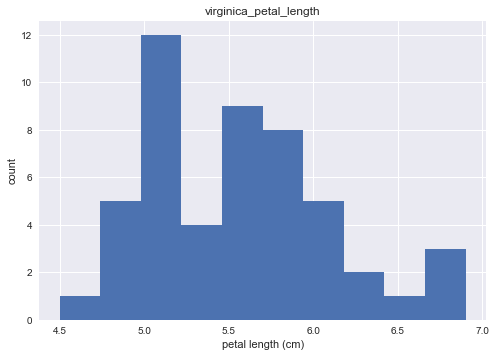

In [8]:
plt.hist(virginica_petal_length)
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')
plt.show()

In [9]:
# Adjusting the number of bins

In [10]:
n_data = len(virginica_petal_length)
n_bins = int(np.sqrt(n_data))
n_bins

7

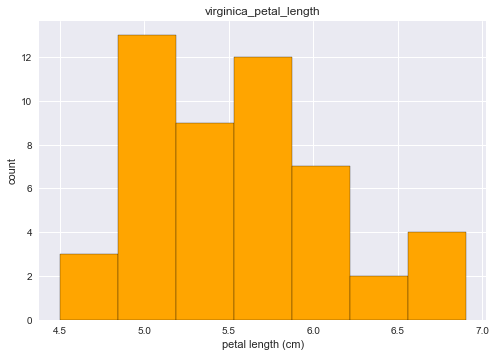

In [11]:
plt.hist(virginica_petal_length, bins=n_bins, edgecolor='black', facecolor='orange')
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')

### Transform iris dataset to pandas DataFrame

In [12]:
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
# 0:setosa, 1:versicolor, 2:virginica
df_iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
df_iris['target'] = df_iris['target'].astype('int')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
def make_species(x):
    l_species = []
    for i in x:
        if (i == 0):
            l_species.append('setosa')
        elif (i == 1):
            l_species.append('versicolor')
        else:
            l_species.append('virginica')
            
    return l_species

In [16]:
df_iris['species'] = make_species(np.array(df_iris['target']))
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Bee swarm plots

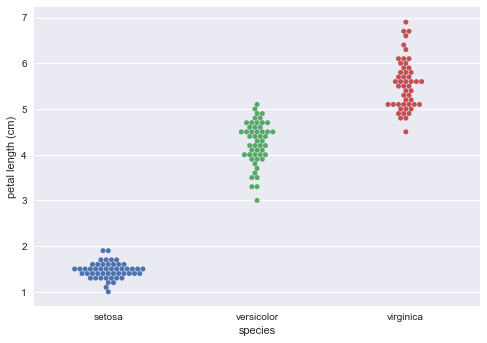

In [17]:
_ = sb.swarmplot(x='species', y='petal_length', data=df_iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

In [19]:
# 2012년 미국 대선 데이터

In [50]:
df = pd.read_csv('data/election2012.csv')
states = (df['state'] == 'CA') | (df['state'] == 'NY') | (df['state'] == 'OH') | (df['state'] == 'TX')
df2012 = df.loc[states]
df2012.head()

,state,county,Obama,Romney,winner,total,margin,turnout
157,CA,Alameda,78.5,18.7,Obama,542421,59.8,2.8
158,CA,Alpine,60.1,36.5,Obama,625,23.6,3.4
159,CA,Amador,39.2,58.2,Romney,14904,19.0,2.6
160,CA,Butte,46.4,50.3,Romney,67879,3.9,3.3
161,CA,Calaveras,40.1,57.1,Romney,17941,17.0,2.8


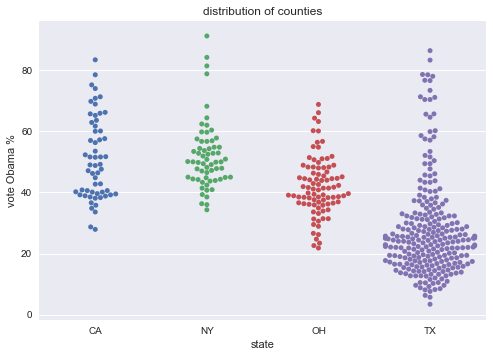

In [51]:
_ = sb.swarmplot(x='state', y='Obama', data=df2012)
_ = plt.xlabel('state')
_ = plt.ylabel('vote Obama %')
_ = plt.title('distribution of counties')
plt.show()

## Empirical cumulative distribution function (ECDF)

In [53]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)      # Number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

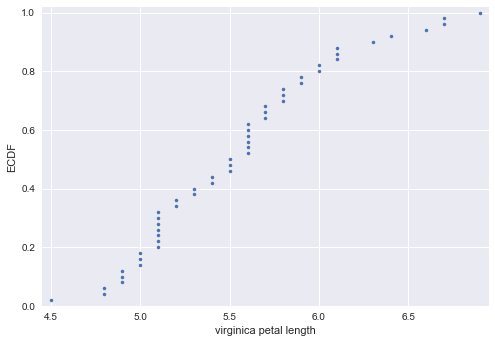

In [54]:
# Compute ECDF for versicolor data
x_value, y_value = ecdf(virginica_petal_length)

# Generate plot
_ = plt.plot(x_value, y_value, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.ylabel('ECDF')
_ = plt.xlabel('virginica petal length')
plt.show()

# 4.5 ~ 5.5cm : 전체의 50%
# 6.0cm 이상 : 전체의 20%

In [44]:
# Comparison of ECDFs

In [55]:
setosa_petal_length = iris.data[0:50,2]
versicolor_petal_length = iris.data[50:100,2]
virginica_petal_length = iris.data[100:150,2]

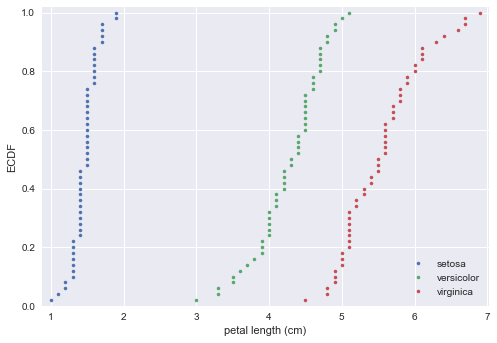

In [56]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.margins(0.02)

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

In [47]:
# 2012 미국 대선

In [59]:
vote_ny = df2012[df2012['state'] == 'NY']['Obama']
vote_oh = df2012[df2012['state'] == 'OH']['Obama']
vote_tx = df2012[df2012['state'] == 'TX']['Obama']

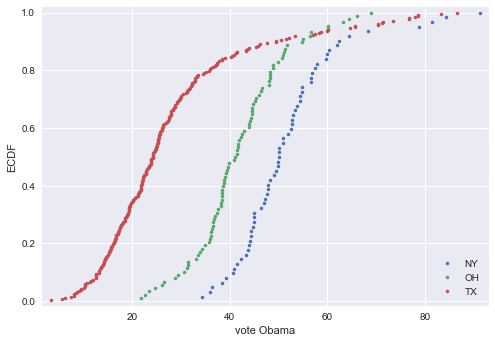

In [60]:
# Compute ECDFs
x_set, y_set = ecdf(vote_ny)
x_vers, y_vers = ecdf(vote_oh)
x_virg, y_virg = ecdf(vote_tx)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.margins(0.02)

# Annotate the plot
_ = plt.legend(('NY', 'OH', 'TX'), loc='lower right')
_ = plt.xlabel('vote Obama')
_ = plt.ylabel('ECDF')

plt.show()

## 2. Quantitative exploratory data analysis

In [61]:
np.mean(vote_ny)

51.967741935483886

In [62]:
np.median(vote_ny)

50.0

### Box plot

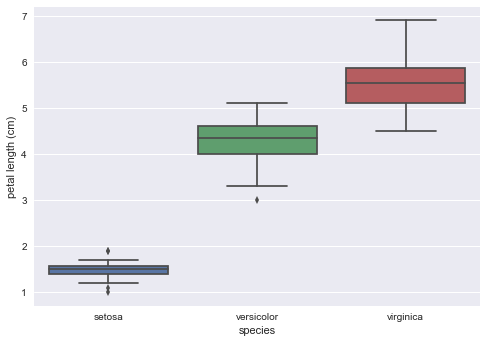

In [65]:
sb.boxplot(x='species', y='petal_length', data=df_iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

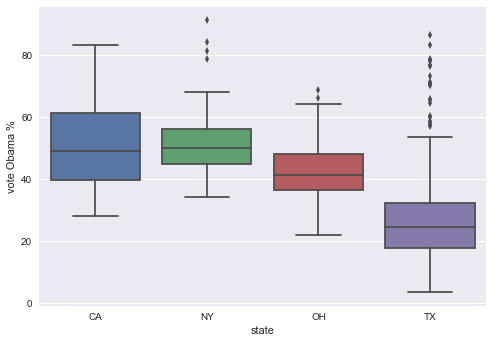

In [67]:
sb.boxplot(x='state', y='Obama', data=df2012)
_ = plt.xlabel('state')
_ = plt.ylabel('vote Obama %')
plt.show()

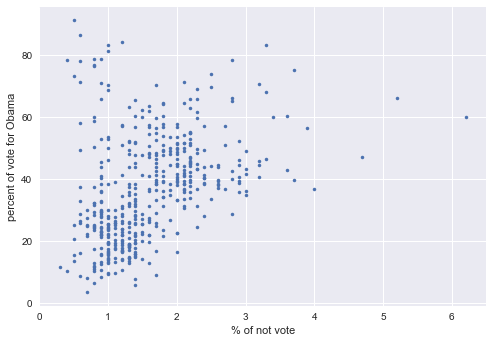

In [81]:
# 미투표자 비율에 대한 오바마 지지율
_ = plt.plot(df2012.turnout, df2012.Obama, marker='.', linestyle='none')
_ = plt.xlabel('% of not vote')
_ = plt.ylabel('percent of vote for Obama')

In [82]:
np.cov(df2012.turnout, df2012.Obama)

array([[   0.56269093,    4.97298927],
       [   4.97298927,  299.29556718]])

In [85]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

In [86]:
pearson_r(df2012.turnout, df2012.Obama)

0.38320610690704887

## Probabilistic logic and statistical inference

### Bernoulli trials - 1 or 0 (성공 / 실패)

In [87]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    
    n_success = 0

    for i in range(n):
        # Choose random number between 0 and 1
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

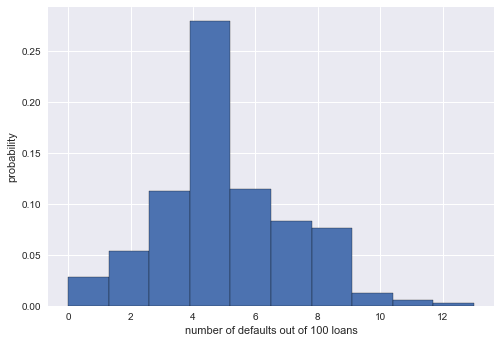

In [94]:
# 100 명의 대출자 파산 확률 0.05. 1000 번 시뮬레이션
n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, normed=True, edgecolor='black')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

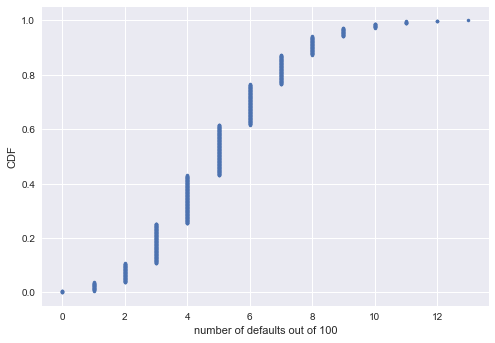

Probability of losing money = 0.028


In [95]:
# 위 상황에 대한 ECDF
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')
plt.show()

# 파산자가 10명 이상이 될 경우의 수 합계
n_lose_money = np.sum(n_defaults >= 10)
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Binomial distribution (이항 분포)

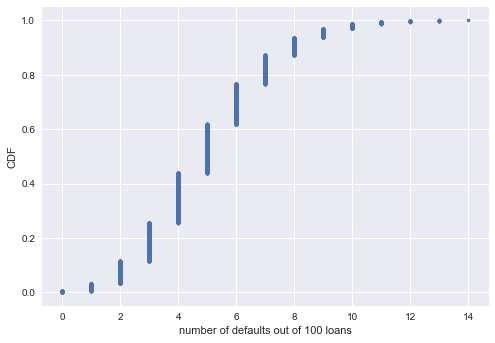

In [96]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# CDF
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')
plt.show()

### Probability mass function (PMF) - The set of probabilities of discrete outcomes

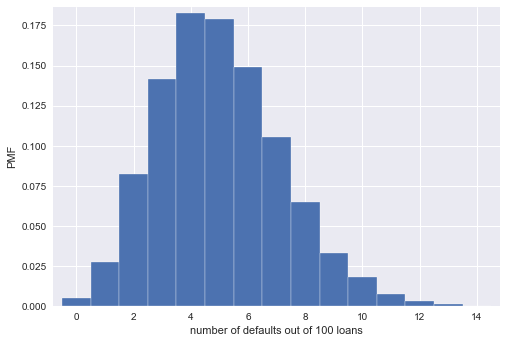

In [98]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, normed=True, bins=bins, edgecolor='white')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')
plt.margins(0.02)
plt.show()